#Machine Learning non-supervisé

#Utiliser les KMeans pour des Trips Uber
Dans ce projet, vous allez vous rendre compte du pouvoir des KMeans dans le monde actuel. J'ai réalisé un moteur de recommendations quant aux endroits où les chauffeurs devraient se trouver pour maximiser leurs chances de trouver une course en fonction de la date et de l'heure de celle-ci.

Nous allons utiliser le Machine Learning pour créer cet algorithme de recommandations.

Nous avons à disposition des données comprenant la date, l'heure, la localisation des courses dans la ville de NYC sur la période avril-septembre 2014 ainsi que les courses par quartiers sur la période janvier-juin 2015.

#Librairies and files import

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from google.colab import files
from google.colab import drive

import folium
from folium.plugins import HeatMap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
taxi_zone = pd.read_csv("/content/drive/My Drive/taxi-zone-lookup.csv")
uber_data_apr14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-apr14.csv")
uber_data_may14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-may14.csv")
uber_data_jun14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-jun14.csv")
uber_data_jul14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-jul14.csv")
uber_data_aug14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-aug14.csv")
uber_data_sep14 = pd.read_csv("/content/drive/My Drive/uber-raw-data-sep14.csv")
uber_data_jan_jun15 = pd.read_csv("/content/drive/My Drive/uber-raw-data-janjune-15.csv")
dataset = uber_data_jan_jun15
uber_data = uber_data_apr14.append(uber_data_may14).append(uber_data_jun14).append(uber_data_jul14).append(uber_data_aug14).append(uber_data_sep14).reset_index()
len(uber_data)

4534327

In [4]:
taxi_zone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [5]:
uber_data.head()

,index,Date/Time,Lat,Lon,Base
0,0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [6]:
dataset.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


#Data Visualisation


##Uber Dispatching Bases

Tout d'abord, nous allons observer l'influence de la localisation sur la Base Uber affectée à la course.

Text(0.5, 1.0, 'Base B02836')

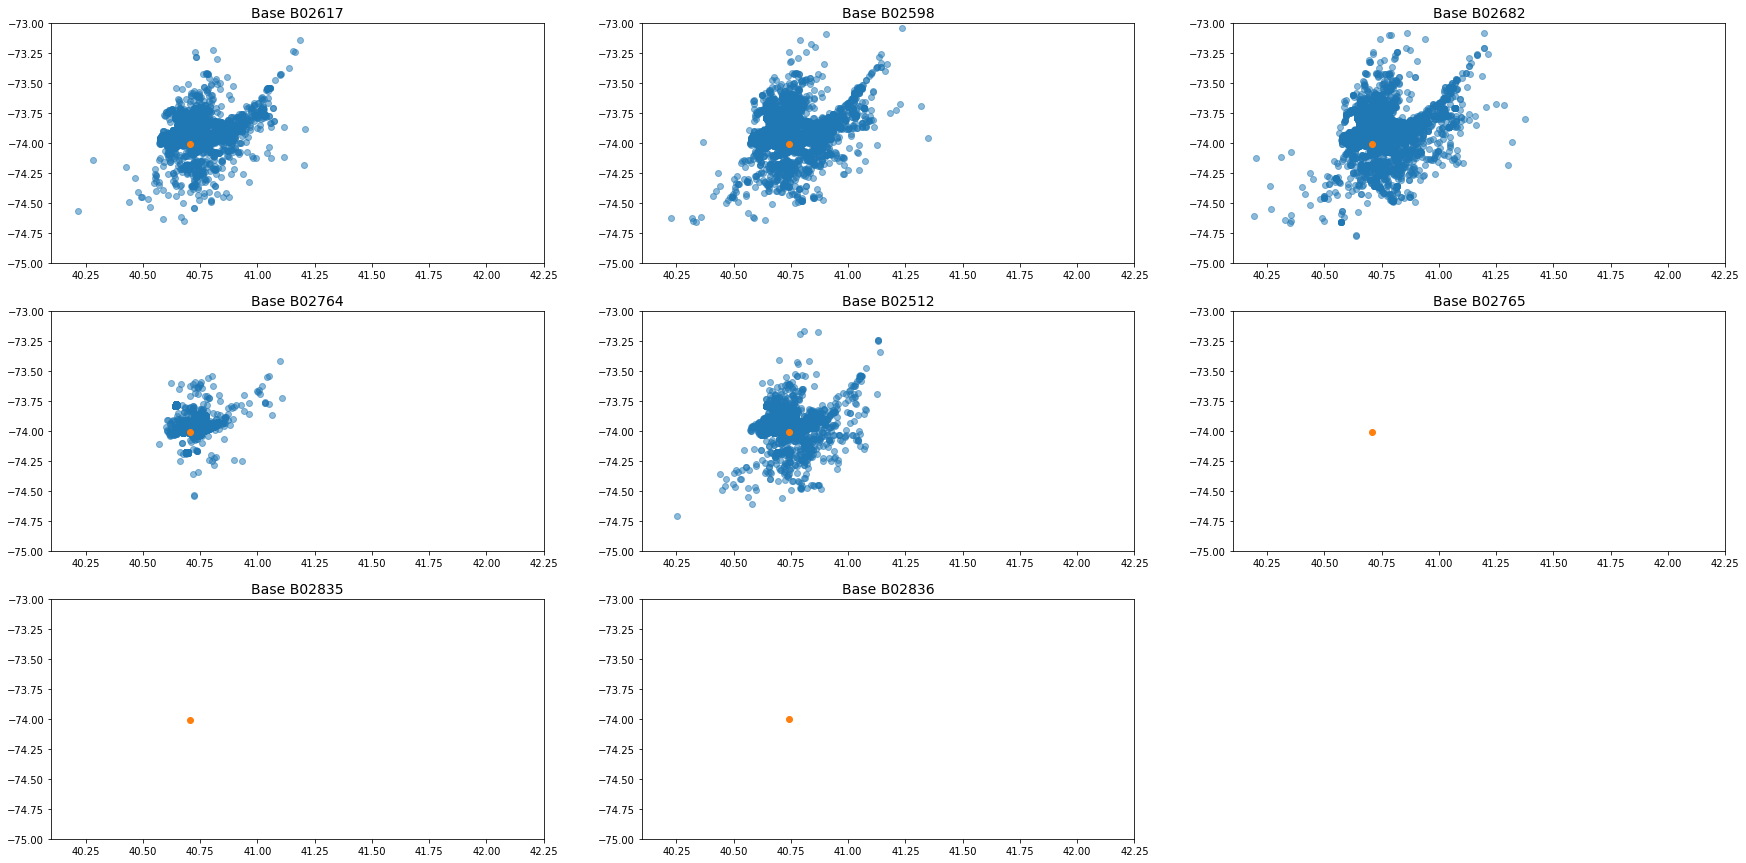

In [7]:
f, axs = plt.subplots(figsize=(30,15))

#Simple scatterplot
plt.subplot(331)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02617"])
plt.scatter(40.707760, -74.008877)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02617", fontsize=14)

plt.subplot(332)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02598"])
plt.scatter(40.740686, -74.001906)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02598", fontsize=14)

plt.subplot(333)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02682"])
plt.scatter(40.708245, -74.008923)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02682", fontsize=14)

plt.subplot(334)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02764"])
plt.scatter(40.708245, -74.008923)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02764", fontsize=14)

plt.subplot(335)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02512"])
plt.scatter(40.741396, -74.003377)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02512", fontsize=14)

plt.subplot(336)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02765"])
plt.scatter(40.708245, -74.008923)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02765", fontsize=14)

plt.subplot(337)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02835"])
plt.scatter(40.708245, -74.008923)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02835", fontsize=14)

plt.subplot(338)
plt.scatter(x='Lat',
            y='Lon',
            alpha=0.5,
            data=uber_data[uber_data.Base=="B02836"])
plt.scatter(40.741396, -74.003377)
plt.xlim(40.1,42.25)
plt.ylim(-75.0,-73,25)
plt.title("Base B02836", fontsize=14)

On peut conclure ici que les bases de dispatching ne sont pas choisies selon des zones particulières. Les bases qui sont en fait les entreprises travaillant pour les clients d'UBER sont choisies aléatoirement en fonction des demandes (ou bien en fonction de paramètres dont nous n'avons pas accès). La colonne Affiliated_base représente la base finale des drivers qui réalisent les courses.

##HeatMap d'un échantillon représentatif des courses

In [8]:
#Select only a part of values to display the map faster
high = len(uber_data)
aleatoire_int = np.random.randint(low=0, high=high,size=30000)
data = uber_data.iloc[aleatoire_int,:]

# Create basic Folium crime map
carte = folium.Map(location=[40.800000,-74.002500], 
                        tiles= "Stamen Toner",
                        zoom_start = 10)

# Add data for heatmp 
data_heatmap = data[['Lat','Lon']]
data_heatmap = data.dropna(axis=0, subset=['Lat','Lon'])
data_heatmap = [[row['Lat'],row['Lon']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(carte)

# Plot!
carte

## Répartition des courses

In [5]:
week_day = {0:"Lundi", 1:"Mardi", 2:"Mercredi", 3:"Jeudi", 4:"Vendredi", 5:"Samedi", 6:"Dimanche"}
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data.DayOfWeekNum.replace(week_day)
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.month
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['Minute'] = uber_data['Date/Time'].dt.minute
uber_data.head()

,index,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Minute
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Mardi,4,0,11
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Mardi,4,0,17
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Mardi,4,0,21
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Mardi,4,0,28
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Mardi,4,0,33


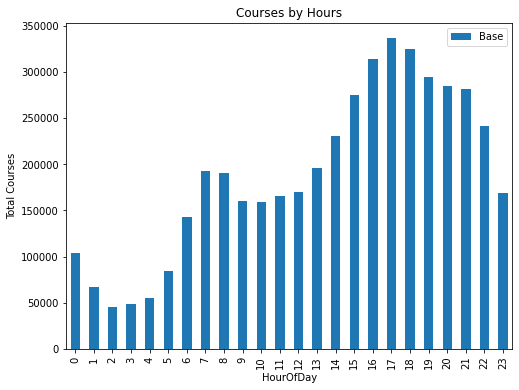

In [9]:
uber_weekdays = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Courses')
plt.title('Courses by Hours');

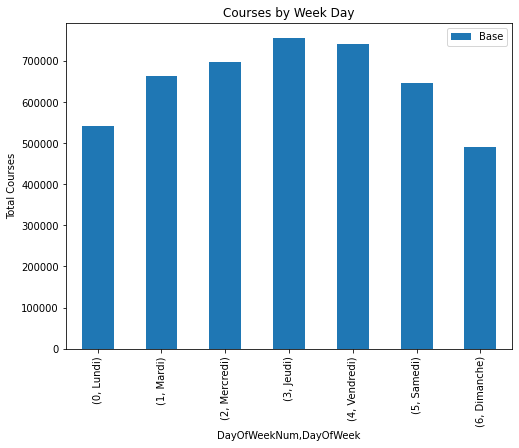

In [10]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Courses')
plt.title('Courses by Week Day');

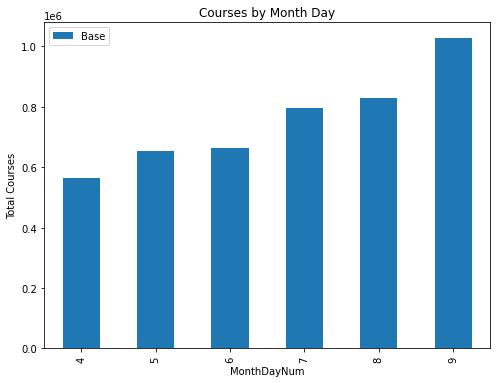

In [11]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Courses')
plt.title('Courses by Month Day');

In [12]:
my_dict = {}
for i in range(len(taxi_zone)):
  my_dict.update({taxi_zone.LocationID[i] : taxi_zone.Zone[i]})
dataset.locationID = dataset.locationID.replace(my_dict)
dataset.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,Lenox Hill West
1,B02617,2015-05-17 09:47:00,B02617,Downtown Brooklyn/MetroTech
2,B02617,2015-05-17 09:47:00,B02617,Garment District
3,B02617,2015-05-17 09:47:00,B02774,East Williamsburg
4,B02617,2015-05-17 09:47:00,B02617,Flatiron


In [0]:
data = dataset.groupby("locationID").count()["Pickup_date"]
data = pd.DataFrame(data.sort_values(ascending=False)[0:20])

Voici le classement des 20 zones qui ont eu le plus de courses durant la période:

In [43]:
data

,Pickup_date
locationID,
Midtown Center,460732
TriBeCa/Civic Center,420356
Union Sq,419045
East Village,407591
West Village,323989
Times Sq/Theatre District,315919
East Chelsea,299781
Midtown North,296734
Murray Hill,290550


In [51]:
dataset['Pickup_date'] =  pd.to_datetime(dataset['Pickup_date'], format='%Y-%m-%d %H:%M:%S')
dataset['Day'] = dataset['Pickup_date'].dt.day
dataset['Month'] = dataset['Pickup_date'].dt.month
dataset['Hour'] = dataset['Pickup_date'].dt.hour
dataset['Minute'] = dataset['Pickup_date'].dt.minute
dataset['Weekday'] = dataset['Pickup_date'].dt.dayofweek
dataset['Weekday'] = dataset.Weekday.replace(week_day)
dataset.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Day,Hour,Minute,Month,Weekday
0,B02617,2015-05-17 09:47:00,B02617,Lenox Hill West,17,9,47,5,Dimanche
1,B02617,2015-05-17 09:47:00,B02617,Downtown Brooklyn/MetroTech,17,9,47,5,Dimanche
2,B02617,2015-05-17 09:47:00,B02617,Garment District,17,9,47,5,Dimanche
3,B02617,2015-05-17 09:47:00,B02774,East Williamsburg,17,9,47,5,Dimanche
4,B02617,2015-05-17 09:47:00,B02617,Flatiron,17,9,47,5,Dimanche


In [53]:
summary = dataset.groupby(['Weekday', 'Hour'])['Pickup_date'].count()
summary = summary.reset_index()
summary = pd.DataFrame(summary)
summary=summary.rename(columns = {'Pickup_date':'Counts'})
summary.head()

,Weekday,Hour,Counts
0,Dimanche,0,156949
1,Dimanche,1,125564
2,Dimanche,2,87501
3,Dimanche,3,61720
4,Dimanche,4,42031


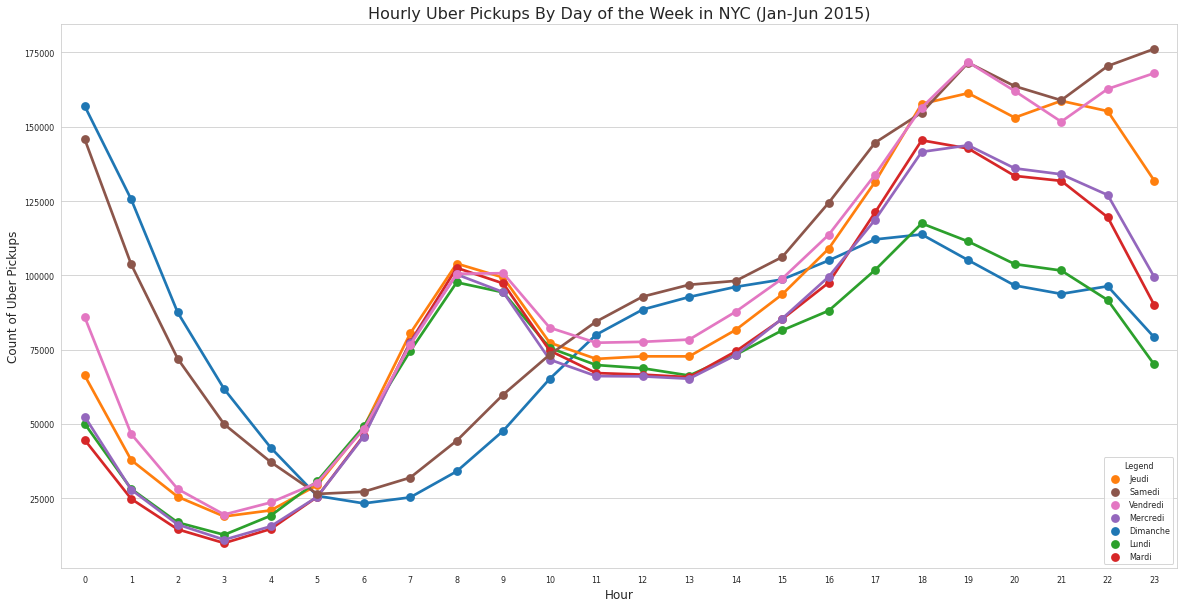

In [58]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
ax = sns.pointplot(x="Hour", y="Counts", hue="Weekday", data=summary)
handles,labels = ax.get_legend_handles_labels()
#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
ax.set_xlabel('Hour', fontsize = 12)
ax.set_ylabel('Count of Uber Pickups', fontsize = 12)
ax.set_title('Hourly Uber Pickups By Day of the Week in NYC (Jan-Jun 2015)', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Legend", prop={'size':8})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

On remarque 2 types de tendances. Les jours de semaine et les jours de week-end.

#Data Cleaning

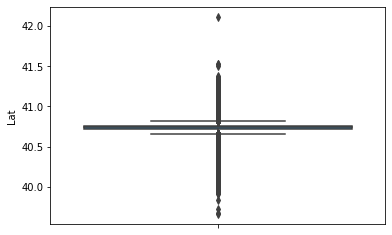

In [8]:
sns.boxplot(uber_data.Lat,orient='v')

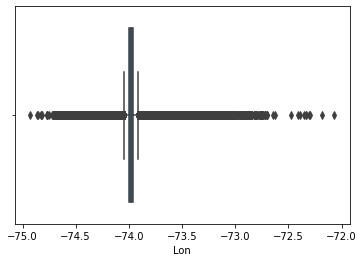

In [9]:
sns.boxplot(uber_data.Lon,orient='h')

A l'aide de ces boxplot, on remarque que la majorité des courses sont concentré sur une petite zone.

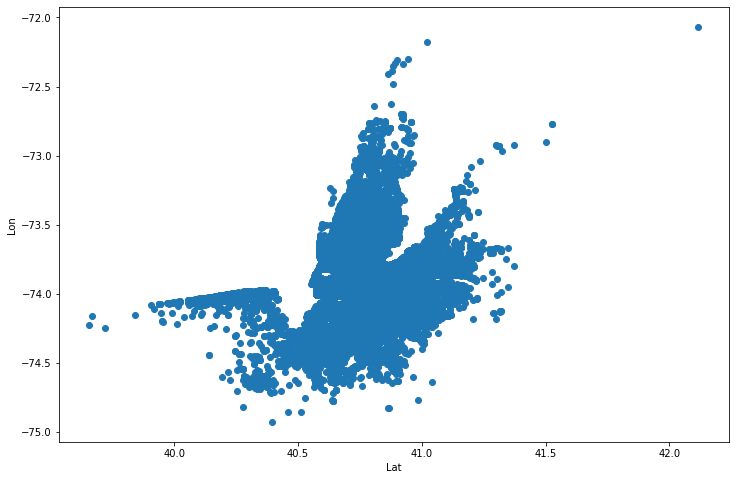

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(uber_data.Lat, uber_data.Lon)
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
plt.show()

Cleaning outliers from the user location (center)

In [0]:
from math import sin, cos, sqrt, atan2, radians

def add_distance(df):
  dist = []
  center = [40.800000,-74.002500]

  # approximate radius of earth in km
  R = 6373.0
  lat1 = radians(center[0])
  lon1 = radians(center[1])
  
  for i in range(len(df)):
    lat2 = radians(df.Lat[i].round(4))
    lon2 = radians(df.Lon[i])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dist.append(distance)

  df["Distance"] = pd.DataFrame(dist)
  return df

In [0]:
uber_data = add_distance(uber_data)

In [13]:
uber_data.Distance.describe()

count    4.534327e+06
mean     8.312067e+00
std      5.073771e+00
min      5.173027e-02
25%      5.257496e+00
50%      6.985741e+00
75%      9.481233e+00
max      2.179073e+02
Name: Distance, dtype: float64

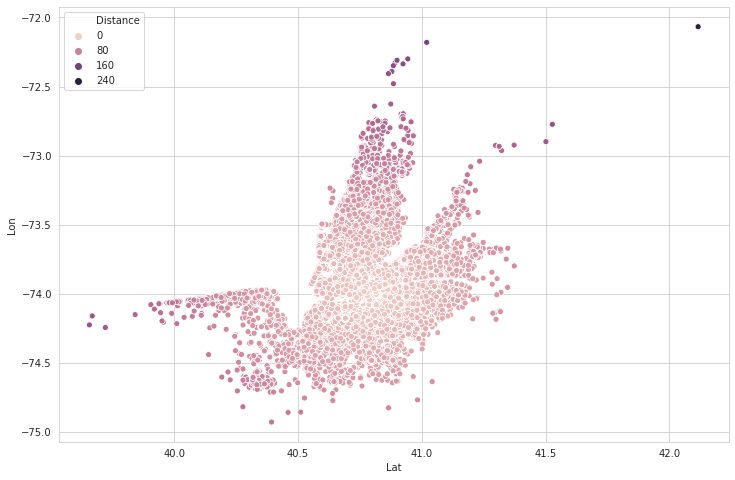

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(uber_data.Lat, uber_data.Lon, hue=uber_data.Distance)
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
plt.show()

In [0]:
def delete_outliers(df):
  #Delete the courses > 10km from the user
  delete = np.where(uber_data.Distance>10)[0].tolist()
  df = df.drop(delete)
  return df

In [0]:
data_clean = delete_outliers(uber_data)

In [28]:
data_clean.shape

(3535769, 11)

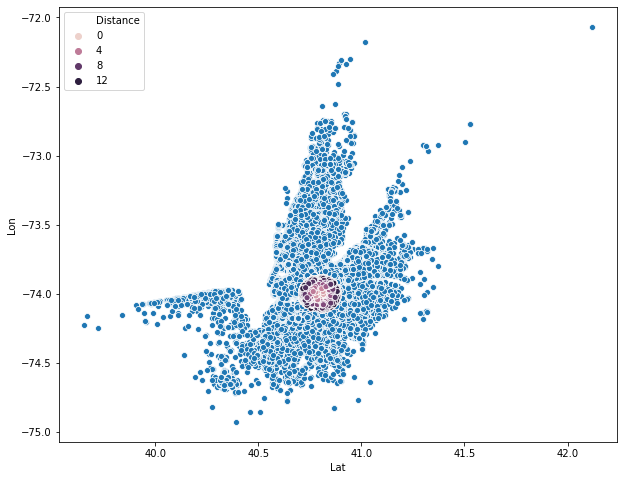

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(uber_data.Lat, uber_data.Lon)
sns.scatterplot(data_clean.Lat, data_clean.Lon,hue=data_clean.Distance)
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
plt.show()

#K-Means Method

In [0]:
data = data_clean[['Lat','Lon']]

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=20)

In [0]:
clusters = kmeans.fit_predict(data)

In [0]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Lat','Lon'])

In [22]:
carte2 = folium.Map(location=[40.800000,-74.002500], 
                        tiles= "Stamen Toner",
                        zoom_start = 10)

# Add clusters to map 
data_map = cluster_centers[['Lat','Lon']]
data_map = cluster_centers.dropna(axis=0, subset=['Lat','Lon'])
data_map = [[row['Lat'],row['Lon']] for index, row in data_map.iterrows()]
for i in range (len(cluster_centers)):
  folium.Marker(data_map[i]).add_to(carte2)

# Plot!
carte2

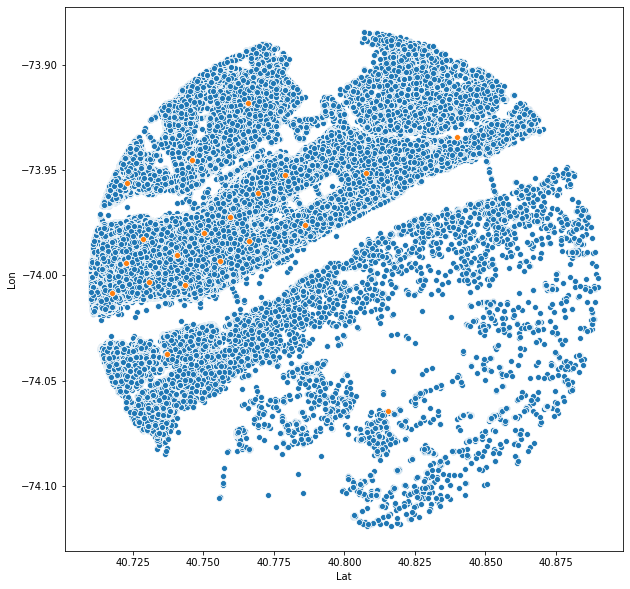

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data_clean.Lat, uber_data.Lon)
sns.scatterplot(cluster_centers.Lat, cluster_centers.Lon)
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
plt.show()

#DBSCAN

In [0]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from matplotlib import cm

In [15]:
data_clean['Day'] = data_clean['Date/Time'].dt.day
data_clean['Month'] = data_clean['Date/Time'].dt.month
data_clean.head()

,index,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Minute,Distance,Day,Month
0,0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Mardi,4,0,11,5.287783,1,4
1,1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Mardi,4,0,17,8.587298,1,4
2,2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Mardi,4,0,21,7.715128,1,4
3,3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Mardi,4,0,28,5.039770,1,4
4,4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Mardi,4,0,33,5.187158,1,4


In [0]:
def get_hot_spots(max_distance,min_cars,data):
    
    ## Transformation des data Lon et Lat en matrice
    coords = np.asmatrix(data_clean[['Lat','Lon']])

    ## Calcul de l'epsilon en fonction de la distance max
    kms_per_radian = 6371.0088
    epsilon = max_distance / kms_per_radian
    
    ## DBSCAN
    db = DBSCAN(eps=epsilon,
                min_samples=min_cars,
                #algorithm='ball_tree',
                metric='haversine').fit(np.radians(coords))
    
    ## groupement des clusters
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
    ## Affiche le nombre de clusters trouvés
    print('Nombre de clusters: {}'.format(num_clusters))
    
    ## Initialisation des listes Lat, Lon, nb_courses
    lat = []
    lon = []
    nb_courses = []
    
    ## loop through clusters and get centroids, number of members
    for ii in range(len(clusters)):

        ## filter empty clusters
        if clusters[ii].any():

            ## get centroid and magnitude of cluster
            lat.append(MultiPoint(clusters[ii]).centroid.x)
            lon.append(MultiPoint(clusters[ii]).centroid.y)
            nb_courses.append(len(clusters[ii]))
            
    hot_spots = [lon,lat,nb_courses]
    
    return hot_spots

In [0]:
## get ride data
ride_data = data_clean.loc[(data_clean['Month'] == 5) & (data_clean['HourOfDay'] == 21) & (data_clean['Day'] == 14)]

## maximum distance between two cluster members in kilometers
max_distance = 0.1

## minimum number of cluster members
min_pickups = 25

## call the get_hot_spots function
hot_spots = get_hot_spots(max_distance ,min_pickups, ride_data)

In [0]:
## make the figure
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

## set the color scale
color_scale = np.log(hot_spots[2])
# color_scale = hot_spots[2]

## make the scatter plot
plt.scatter(hot_spots[0], hot_spots[1],s=80,c=color_scale,cmap=cm.cool)

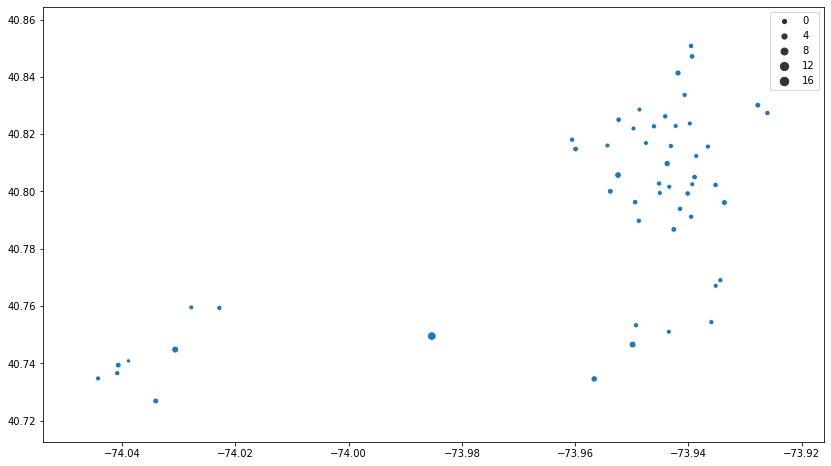

In [0]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
sns.scatterplot(x=hot_spots[0], y=hot_spots[1],size=np.log(hot_spots[2]))

In [0]:
def create_map_locations(lat,lon):
  clusters = []
  for i in range(len(lat)):
    clusters[i,0]=pd.DataFrame(np.array(lat[i]))
    clusters[i,1]=pd.DataFrame(np.array(lon[i]))
  clusters["0"].rename("Lat")
  clusters["1"].rename("Lon")
  return clusters

In [0]:
# Create basic Folium crime map
driver_map = folium.Map(location=[40.800000,-74.002500], 
                        tiles= "Stamen Toner",
                        zoom_start = 10)

# Add data for heatmp 
data = []
data = pd.DataFrame(hot_spots[1])
data = data.rename(columns={0:'Lat'})
data['Lon'] = pd.DataFrame(hot_spots[0])
data_heatmap = data.dropna(axis=0, subset=['Lat','Lon'])
data_heatmap = [[row['Lat'],row['Lon']] for index, row in data_heatmap.iterrows()]
for i in range (len(data_heatmap)):
  folium.Marker(data_heatmap[i]).add_to(driver_map)

# Plot!
driver_map